1、订单长度，shape、columns
2、统计菜品平均价格（amounts）
3、什么菜最受欢迎
4、哪个订单ID点的菜最多
5、

In [2]:

#1、加载数据
#2、数据预处理
#3、数据可视化matplotlib



In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#1、加载数据
data1 = pd.read_excel('C:\\Users\\Administrator\\Desktop\\meal_order_detail.xlsx',sheet_name='meal_order_detail1')
data2 = pd.read_excel('C:\\Users\\Administrator\\Desktop\\meal_order_detail.xlsx',sheet_name='meal_order_detail2')
data3 = pd.read_excel('C:\\Users\\Administrator\\Desktop\\meal_order_detail.xlsx',sheet_name='meal_order_detail3')

In [4]:
#2、数据预处理
#合并数据、处理NA变量
data = pd.concat([data1,data2,data3],axis=0)#按照行拼接数据
data.dropna(axis=1,inplace = True)#行0列1
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10037 entries, 0 to 3610
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   detail_id         10037 non-null  int64         
 1   order_id          10037 non-null  int64         
 2   dishes_id         10037 non-null  int64         
 3   dishes_name       10037 non-null  object        
 4   itemis_add        10037 non-null  int64         
 5   counts            10037 non-null  int64         
 6   amounts           10037 non-null  int64         
 7   place_order_time  10037 non-null  datetime64[ns]
 8   add_inprice       10037 non-null  int64         
 9   picture_file      10037 non-null  object        
 10  emp_id            10037 non-null  int64         
dtypes: datetime64[ns](1), int64(8), object(2)
memory usage: 941.0+ KB


In [5]:
#统计卖出菜品的平均价格
#1、方法一：pandas自带函数：
round(data['amounts'].mean(),2)#保留两位小数
#2、方法二：使用numpy.mean
round(np.mean(data['amounts']),2)#数据量多推介

44.82

In [6]:
#频数统计，什么菜最受欢迎(对菜名进行频数统计，取前10名）
dishes_count = data['dishes_name'].value_counts()
#dishes_count.head(10)#方法一
dishes_count = dishes_count[:10]#方法二
dishes_count

dishes_name
白饭/大碗        323
凉拌菠菜         269
谷稻小庄         239
麻辣小龙虾        216
辣炒鱿鱼         189
芝士烩波士顿龙虾     188
五色糯米饭(七色)    187
白饭/小碗        186
香酥两吃大虾       178
焖猪手          173
Name: count, dtype: int64

0 323
1 269
2 239
3 216
4 189
5 188
6 187
7 186
8 178
9 173


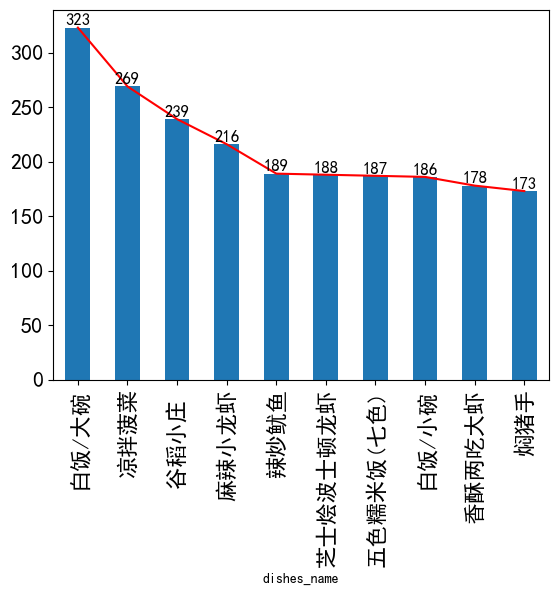

In [7]:
#3、数据可视化matplotlib
#直方图--bar
#折线图--line
plt.rcParams['font.sans-serif'] = 'SimHei'##设置中文提示
%matplotlib inline
dishes_count.plot(kind='line',color=['r'])
dishes_count.plot(kind='bar',fontsize=16)
for x,y in enumerate(dishes_count):
    print(x,y)
    plt.text(x,y+2,y,ha='center',fontsize=12)#值绘制
plt.show()

In [8]:
#加大畅销力度==送酒水

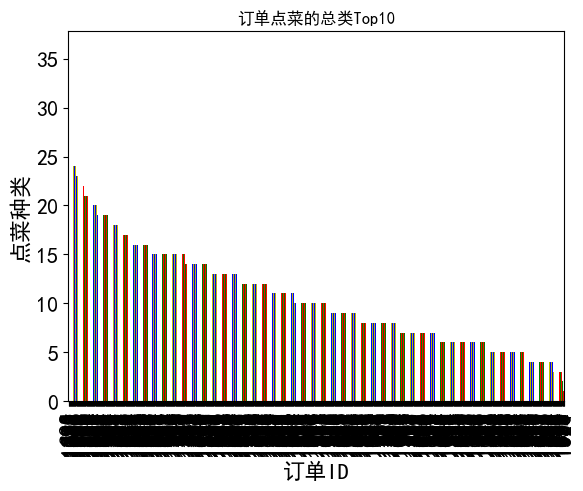

In [55]:
#订单点菜的种类最多（1，1，1  1，2，3）
#第一种
#data.groupby(by='order_id')
#第二种
data_group = data['order_id'].value_counts()
data_group.plot(kind='bar',fontsize=16,color=['r','y','g','b'])
plt.title('订单点菜的总类Top10')
plt.xlabel('订单ID',fontsize=16)
plt.ylabel('点菜种类',fontsize=16)
plt.show()
#得出8月份餐厅订单点菜种类前10名，平均点菜25个菜品

In [ ]:
#得出的信息：点菜种类

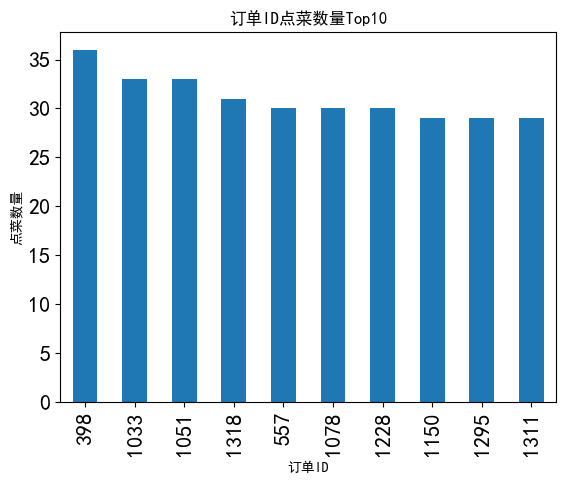

In [27]:
#订单ID平均菜品最贵前10名（（分组order_id,conuts求和，排序，前十)
data['total_amounts'] = data['counts']*data['amounts']#统计单道菜消费总额
dataGroup = data[['order_id','counts','amounts','total_amounts']].groupby(by='order_id')
Group_sum = dataGroup.sum()#分组求和
sort_counts = Group_sum.sort_values(by='counts',ascending=False)
sort_counts['counts'][:10].plot(kind='bar',fontsize=16)
plt.xlabel('订单ID')
plt.ylabel('点菜数量')
plt.title('订单ID点菜数量Top10')
plt.show()
#订单ID点菜数量最多
#8月份订单点菜前10名

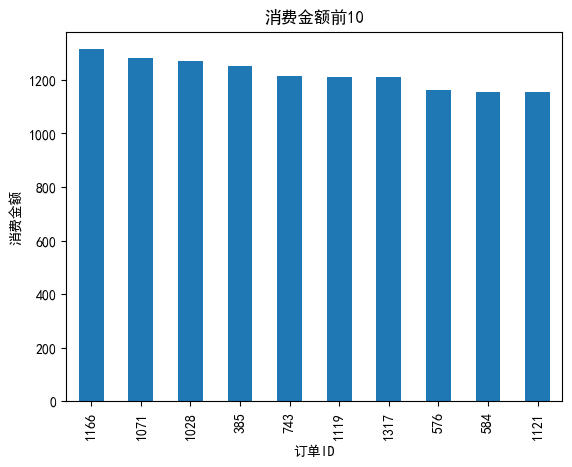

In [37]:
#那个订单ID吃的钱最多（排序）
sort_total_amounts = Group_sum.sort_values(by='total_amounts',ascending = False)
sort_total_amounts['total_amounts'][:10].plot(kind='bar')
plt.xlabel('订单ID')
plt.ylabel('消费金额')
plt.title('消费金额前10')
plt.show()
#大众的消费金额

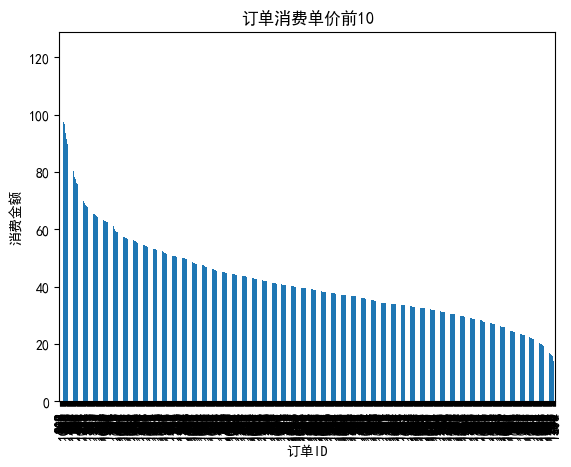

In [53]:
#消费单价
#哪个订单ID平均消费最贵
Group_sum['average'] = Group_sum['total_amounts']/Group_sum['counts']
sort_average = Group_sum.sort_values(by='average',ascending=False)
sort_average['average'][:].plot(kind='bar')
plt.xlabel('订单ID')
plt.ylabel('消费金额')
plt.title('订单消费单价前10')
plt.show()

In [ ]:
#写入消费报告
#平均值--大众普通消费者
#人均7、8十
#高档、低档2、3十

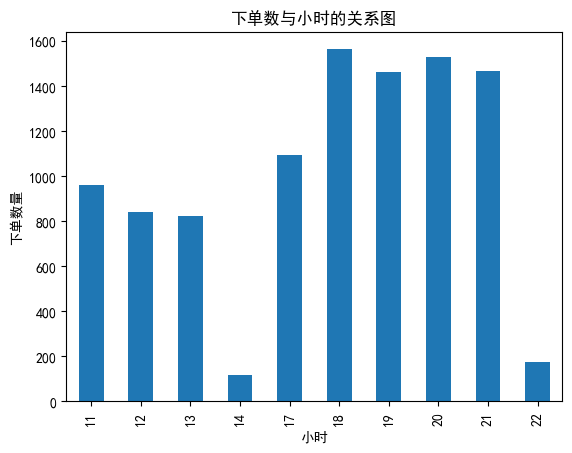

In [61]:
#时间分析
#一天当中什么时间段，点菜量比较集中（hour)
data['hourcount'] = 1 #新列，用作计数器
data['time'] = pd.to_datetime(data['place_order_time'])#将时间转换成日期类型存储
data['hour'] = data['time'].map(lambda x:x.hour)
#.方法二：：dt.hour	列是 Pandas 日期时间类型（dtype=datetime64）	更快（向量化操作）
gp_by_hour = data.groupby(by='hour').count()['hourcount']
gp_by_hour.plot(kind='bar')
plt.xlabel('小时')
plt.ylabel('下单数量')
plt.title('下单数与小时的关系图')   
plt.show()

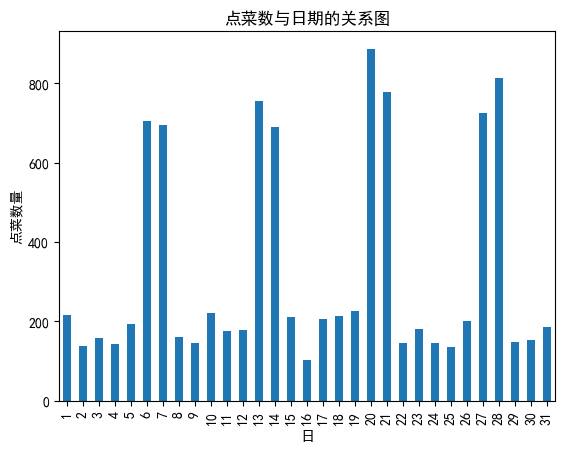

In [73]:
#八月份那一天的订单数量最多
data['daycount'] = 1
data['day'] = data['time'].map(lambda x:x.day)#解析出天
gp_by_day = data.groupby(by='day').count()['daycount']
gp_by_day.plot(kind='bar')
plt.xlabel('日')
plt.ylabel('点菜数量')
plt.title('点菜数与日期的关系图')  
plt.show()
#信息--周末的备菜量应该是平日的4倍

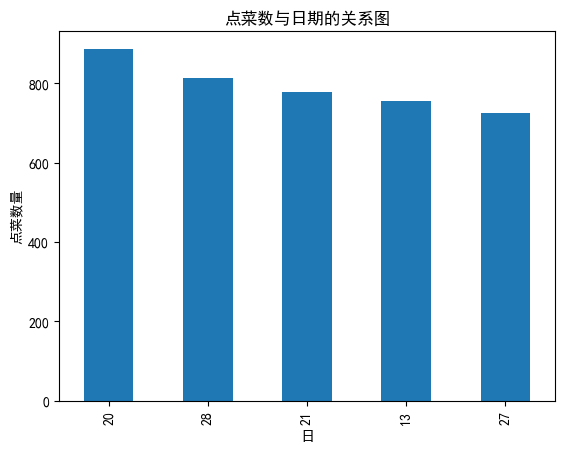

In [79]:
#拓展：排序，取点菜量最大的前5天
#sort_average = Group_sum.sort_values(by='average',ascending=False)
gp_by = gp_by_day.sort_values(ascending = False)[:5]
gp_by.plot(kind='bar')
plt.xlabel('日')
plt.ylabel('点菜数量')
plt.title('点菜数与日期的关系图')  
plt.show()

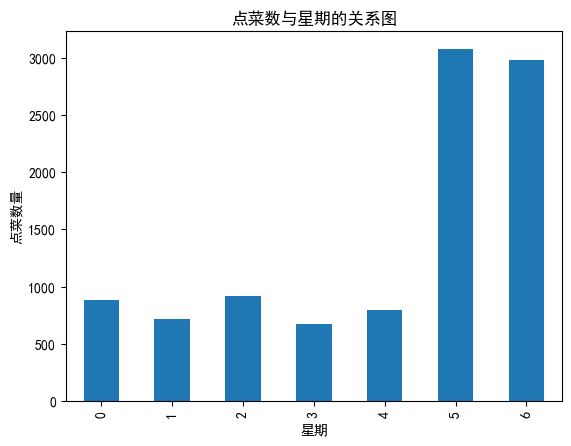

In [85]:
#按星期几人数最多，订餐数最多，映射到星期
data['weekcount'] = 1
data['weekday'] = data['time'].map(lambda x:x.weekday())
gp_by_weekday = data.groupby(by='weekday').count()['weekcount']
gp_by_weekday.plot(kind='bar')
plt.xlabel('星期')
plt.ylabel('点菜数量')
plt.title('点菜数与星期的关系图')  
plt.show()

总结：
不同维度进行数据分析：
针对订单量order_id:什么菜最受欢迎、点菜的种类、点菜的数量、消费金额最大、平均消费
针对时间日期进行分析：点菜量比较集中的时间、哪一天的订餐量最大、星期几就餐人数最多
技术点：拼接技术；pd.concat([列1,列2.......])
        分组进行统计：dataGroup = data[['order_id','counts','amounts','total_amounts']].groupby(by='order_id')
                     Group_sum = dataGroup.sum()（分组求和）
        排序，切片Top10：gp_by_weekday = data.groupby(by='weekday').count()['weekcount']
        绘制柱状图走势和高度：
            plt.rcParams['font.sans-serif'] = 'SimHei'##设置中文提示
            %matplotlib inline
            dishes_count.plot(kind='line',color=['r'])
            dishes_count.plot(kind='bar',fontsize=16)
            for x,y in enumerate(dishes_count):
                print(x,y)
                plt.text(x,y+2,y,ha='center',fontsize=12)#值绘制
            plt.show()